# Mini Project 1
## Chuyun Hu
### (1) Load seed data

In [1]:
import pandas as pd

# set up read path
url="https://raw.githubusercontent.com/huchuyun/Neual-Networks-Deep-Learning/main/Mini%20Project%201/seeds_dataset.txt"
# specify columns' name
col=["area", "perimeter", "compactness", "length of kernel", 
     "width of kernel", "asymmetry coefficient", "length of kernel groove","type"]
# read data
seed=pd.read_csv(url,header=None,sep='\s+')
seed.columns=col
# view data
print("date shape :",seed.shape)
seed.head()

date shape : (210, 8)


,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [2]:
# check if there are missing values
seed.isnull().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
type                       0
dtype: int64

In [3]:
# check type of data
seed.dtypes

area                       float64
perimeter                  float64
compactness                float64
length of kernel           float64
width of kernel            float64
asymmetry coefficient      float64
length of kernel groove    float64
type                         int64
dtype: object

### (2) create dummy variables      
To make the target column in the data set have three rows, create a dummy variable for the "type" column

In [4]:
import pandas as pd
target_dummy=pd.get_dummies(seed['type'])
target_dummy

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
205,0,0,1
206,0,0,1
207,0,0,1
208,0,0,1


### (3) split data into 150 + 60

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(seed.iloc[:,:7].values,target_dummy.values,
                                               test_size=60,random_state=1,stratify=seed.iloc[:,7])
# view X_tran
print("X_train shape :",X_train.shape)
X_train

X_train shape : (150, 7)


array([[18.94  , 16.32  ,  0.8942, ...,  3.825 ,  2.908 ,  5.949 ],
       [18.65  , 16.41  ,  0.8698, ...,  3.594 ,  4.391 ,  6.102 ],
       [12.15  , 13.45  ,  0.8443, ...,  2.837 ,  3.638 ,  5.338 ],
       ...,
       [15.26  , 14.85  ,  0.8696, ...,  3.242 ,  4.543 ,  5.314 ],
       [13.54  , 13.85  ,  0.8871, ...,  3.156 ,  2.587 ,  5.178 ],
       [20.16  , 17.03  ,  0.8735, ...,  3.773 ,  1.91  ,  6.185 ]])

### (4) use one pass function ( in last assignment) to write epoch function and neural nerwork

In [6]:
import numpy as np
import random

def init_w(a,b):
    '''This function is used to create an initial weight matrix(a*b) 
    with each entry in the range -0.5~0.5'''
    w=np.zeros((a,b))
    for i in range(a-1):
        for j in range(b):
            w[i][j]=random.uniform(-0.5,0.5)
    r=random.uniform(-0.5,0.5)
    for j in range(b):
        w[a-1][j]=r
    return w

def myappend(v):
    '''This function is used to add a 1 to the end of the input vector'''
    v_new=v
    v_new=np.append(v_new,1)
    return v_new

def get_raw(v,w):
    '''This function is used to calculate the raw input of 
    the hidden layer and the output layer'''
    v=myappend(v)
    return np.dot(v,w)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def activate(w):
    '''This function is used to calculate the activated value of 
    the hidden layer and the output layer'''
    wnew=[]
    for i in w:
        wnew.append(sigmoid(i))
    return wnew

def get_loss(outp,tar):
    '''This function uses the activation output and the target output 
    to calculate the loss error.'''
    outp=np.array(outp)
    tar=np.array(tar)
    return 0.5*np.dot((outp-tar).T,(outp-tar))

def g_i2h(outp,tar,thid,inp,whid):
    '''This function is used to calculate the gradients of the weights 
    from the input nodes to the output nodes'''
    n=len(thid)-1
    m=len(outp)
    l=len(inp)-1
    gin=np.zeros((l,n))
    for i in range(l):
        for j in range(n):
            s=0
            for k in range(m):
                s+=(outp[k]-tar[k])*outp[k]*(1-outp[k])*whid[j][k]
            gin[i][j]=s*thid[j]*(1-thid[j])*inp[i]
    return gin

def bias_h(outp,tar,whid,thid):
    '''This function is used to calculate the gradient of the weight
    from the bias term to the hidden nodes'''
    ss=0
    m=len(outp)
    n=len(thid)
    for j in range(n):
        s=0
        for k in range(m):
            s=s+(outp[k]-tar[k])*outp[k]*(1-outp[k])*whid[j][k]
        ss=ss+s*thid[j]*(1-thid[j])
    return ss

def update_win(alpha,outp,tar,thid,inp,whid,win):
    '''This function is used to update the weights and bias
    for the input-to-hidden-node step.'''
    gin=g_i2h(outp,tar,thid,inp,whid)
    biash=bias_h(outp,tar,whid,thid)
    (n,m)=gin.shape
    win_new=win
    for i in range(n):
        for j in range(m):
            win_new[i][j]=win[i][j]-alpha*gin[i][j]
    for j in range(m):
        win_new[n][j]=win[n][j]-alpha*biash
    return win_new

def g_h2o(outp,tar,thid):
    '''This function is used to calculate the gradients of the weights 
    from the hidden nodes to the output nodes'''
    n=len(thid)-1
    m=len(outp)
    ghid=np.zeros((n,m))
    for j in range(n):
        for k in range(m):
            ghid[j][k]= (outp[k]-tar[k])*outp[k]*(1-outp[k])*thid[j]
    return ghid

def bias_o(outp,tar):
    '''This function is used to calculate the gradient of the weight
    from the bias term to the output nodes'''
    s=0
    m=len(outp)
    for k in range(m):
        s=s+(outp[k]-tar[k])*outp[k]*(1-outp[k])
    return s

def update_whid(alpha,outp,tar,thid,whid):
    '''This function is used to update the weights 
    for the input-to-hidden-node step.'''
    ghid=g_h2o(outp,tar,thid)
    biaso=bias_o(outp,tar)
    (n,m)=ghid.shape
    whid_new=whid
    for i in range(n):
        for j in range(m):
            whid_new[i][j]=whid[i][j]-alpha*ghid[i][j]
    for j in range(m):
        whid_new[n][j]=whid[n][j]-alpha*biaso
    return whid_new

def one_pass(f,t,W_input,W_hidden,alpha):
    '''This function is used to performs one entire pass 
    based on a single training instance'''
    # Forward Propagation
    h_raw=get_raw(f,W_input)
    h_activated=activate(h_raw)
    o_raw=get_raw(h_activated,W_hidden)
    # Get output
    o_activated=activate(o_raw)
    # Calculate the loss function
    E=get_loss(o_activated,t)
    
    # Backward Propagation
    # updata weight parameters 
    W_hidden = update_whid(alpha,o_activated,t,h_activated,W_hidden)
    W_input = update_win(alpha,o_activated,t,h_activated,f,W_hidden,W_input)
    return W_input,W_hidden,E

def epoch(X,y,W_input,W_hidden,alpha):
    '''This function is used to performs one epoch on train set'''
    # Use each instance in the training set to 
    # update all weights in the neural network once
    cost=0
    n=len(X)
    for i in range(n):
        W_input,W_hidden,loss=one_pass(X[i],y[i],W_input,W_hidden,alpha)
        cost+=loss
    # Calculate cost function
    cost=cost/n
    return W_input,W_hidden,cost

import matplotlib.pyplot as plt

def neural_network(X,y,max_error=0.01,max_epoch=2000,alpha=0.2):
    '''This function use epoch function to implement neural network.'''
    # initilize all weight
    W_input=init_w(8,7)
    W_hidden=init_w(8,3)
    n=len(X)
    step=0
    # calculate the initial cost function
    cost=0
    for i in range(n):
        # Forward Propagation
        h_raw=get_raw(X[i],W_input)
        h_activated=activate(h_raw)
        o_raw=get_raw(h_activated,W_hidden)
        # Get output
        o_activated=activate(o_raw)
        # Calculate the loss function
        E=get_loss(o_activated,y[i])
        cost+=E
    cost=cost/n
    # use costlist to record cost function for each epoch
    costlist=[]
    costlist.append(cost)
    while((cost>max_error)and(step<max_epoch)):
        W_input,W_hidden,cost=epoch(X,y,W_input,W_hidden,alpha)
        costlist.append(cost)
        step+=1
        
    # Plot the change of the cost function with the number of epochs
    plt.figure(figsize = (10,5))
    plt.title("alpha = %.2f"%alpha)
    plt.xlabel("number of epoch")
    plt.ylabel("cost function")
    plt.plot(range(step+1),costlist,color='b')
    plt.grid()
    plt.show()

    return W_input,W_hidden

### (5) use neural network model to fit train set and tuning alpha(learning rate)

NN model is represented by W_input and W_output in my work

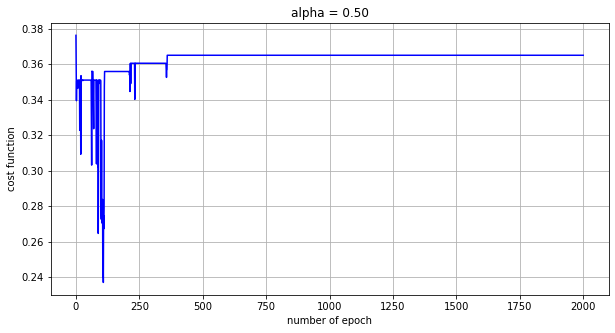

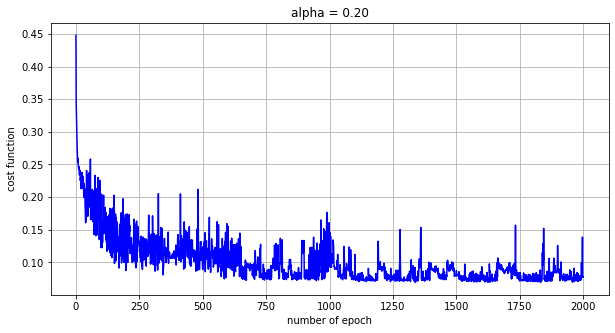

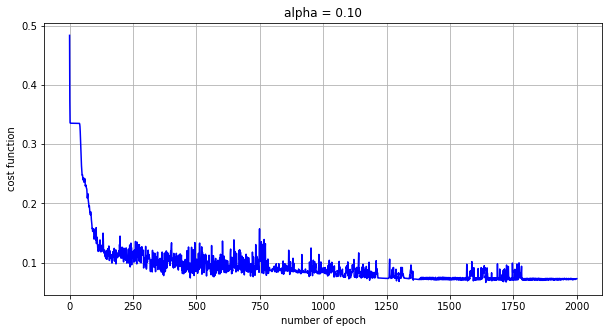

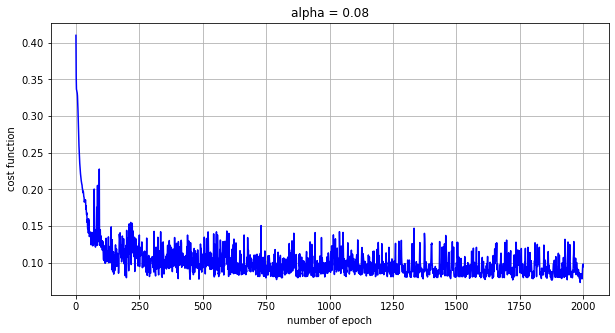

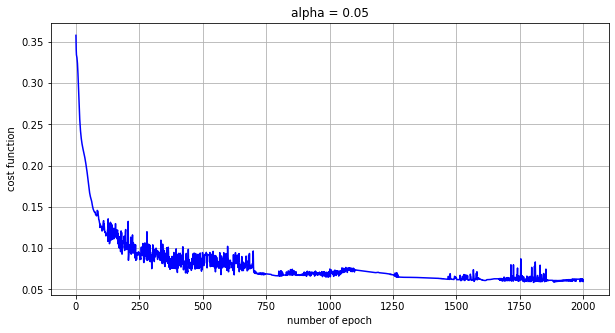

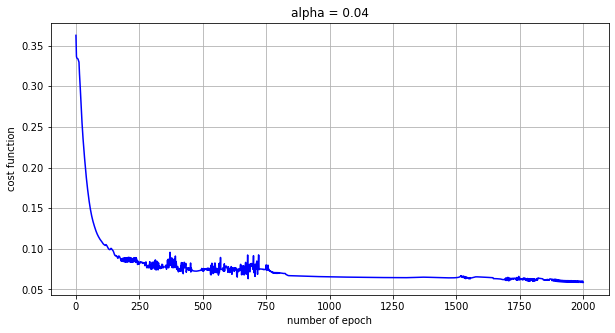

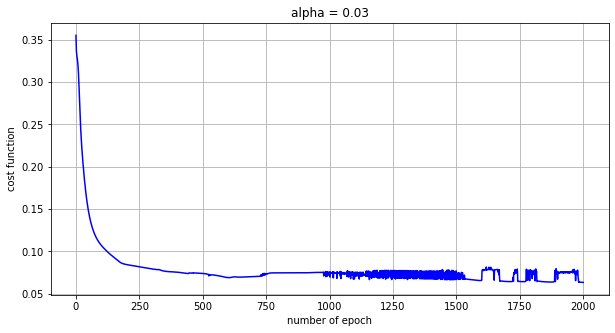

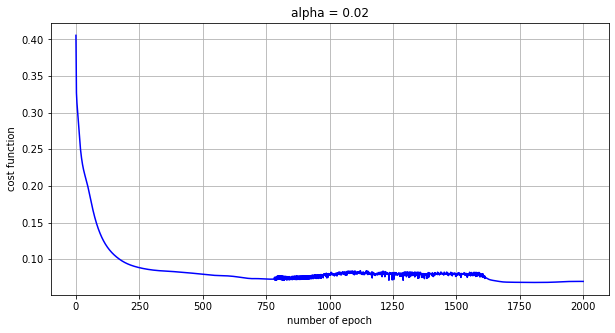

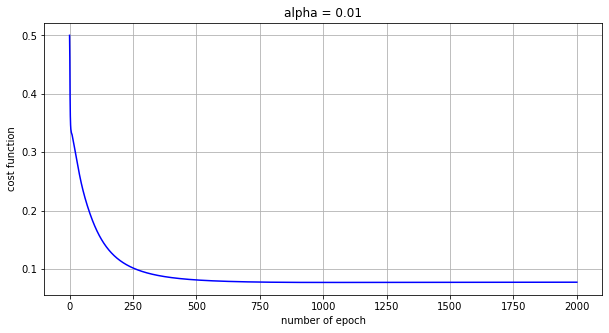

In [7]:
alphalist=[0.5,0.2,0.1,0.08,0.05,0.04,0.03,0.02,0.01]
for i in alphalist:
    Win,Whid=neural_network(X_train,y_train,alpha=i)

From the above pictures, when the learning rate alpha=0.01, the loss function looks better, so I chose the NN model with alpha=0.01

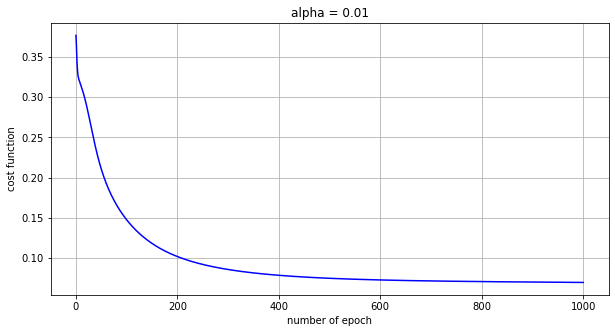

The weight of the input layer is :
[[ 2.60596705  0.03349588  4.67967814 -2.05141819  0.42103931  2.39470012
   0.26316912]
 [-1.20887441 -0.23988371 -3.94275768  1.80833499  0.38363139 -1.53392668
  -0.46648755]
 [ 0.36843443 -0.08063952 -0.49224647  0.69362477 -0.43122525 -0.32957441
  -0.44695834]
 [-0.87768255 -0.24021768 -1.91289302  0.90990362  0.16180192 -1.10879219
  -0.22696573]
 [ 0.81354926 -0.291306   -1.47469508  0.56774594  0.46431831  0.35795833
   0.16092328]
 [-2.02717689 -0.06702408  2.01621757  0.07903662  0.21447228 -0.72522004
  -0.16256574]
 [-1.1987475  -0.41969623 -0.77204998 -0.61235565 -0.94357919 -0.4985944
  -0.33571102]
 [-0.23336852 -0.23336852 -0.23336852 -0.23336852 -0.23336852 -0.23336852
  -0.23336852]]
The weight of the hidden layer is :
[[ 3.25557464  0.57493874 -2.75535164]
 [ 0.17109881  0.0444858   0.1297501 ]
 [-5.29163632  3.93430726 -1.4104153 ]
 [-0.57578058 -3.62410534  2.37992104]
 [-2.16733375 -2.30133792  1.12457476]
 [ 1.82139908  0.92433

In [14]:
W_input,W_hidden=neural_network(X_train,y_train,max_epoch=1000,alpha=0.01)
print("The weight of the input layer is :")
print(W_input)
print("The weight of the hidden layer is :")
print(W_hidden)

### (6) write predict function
This function can receive feature variables and the trained NN model(W_input and W_hidden), and output the model prediction results

In [15]:
def predict(X,Win,Whid):
    y=[]
    for i in X:
        #Forward Propagation
        h_raw=get_raw(i,Win)
        h_activated=activate(h_raw) 
        o_raw=get_raw(h_activated,Whid)
        # Get output
        o_activated=activate(o_raw)
        # Find the maximum value in the output vector 
        # and set it to 1, and the rest to 0
        o_max=np.max(o_activated)
        for j in range(len(o_activated)):
            if o_activated[j]==o_max:
                o_activated[j]=1
            else:
                o_activated[j]=0
                
        y.append(o_activated)
    return y

In [16]:
# check a part of predict result
y_pred=predict(X_test,W_input,W_hidden)
y_pred[:5]

[[0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0]]

In [17]:
y_test[:5]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

### （7）Write a function to calculate the prediction accuracy and confusion matrix to evaluate the model
This function receives the target output and prediction output, and returns the similarity between them

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate(actual,predict):
    n=len(actual)
    m=len(actual[0])
    # use pred_num to record the number of instances with accurate predictions
    pred_num=0
    for i in range(n):
        if(list(actual[i])==list(predict[i])):
            pred_num+=1
    print("The prediction accuracy of this NN model on test data is ",pred_num/n)
    
    # Restore the predicted results and actual results into a one-dimensional list
    actual_r=[]
    predict_r=[]
    for i in range(n):
        for j in range(m):
            if(actual[i][j]==1):
                actual_r.append(j+1)
            if(predict[i][j]==1):
                predict_r.append(j+1)

                
    # get confusion matrix
    cm = confusion_matrix(actual_r,predict_r)
    ax=sns.heatmap(cm,fmt='g',annot=True,cmap='Blues') 
    ax.set_title('confusion matrix') 
    ax.set_xlabel('predict') 
    ax.set_ylabel('actual') 
    plt.show()
    

The prediction accuracy of this NN model on test data is  0.9166666666666666


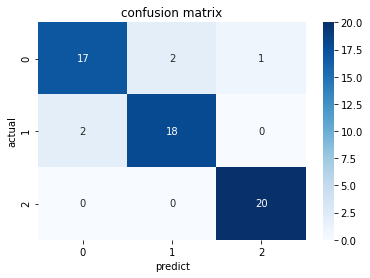

In [40]:
evaluate(y_test,y_pred)

### (8) Conclusion

I tried several different learning rates, but no matter which one I use, the cost function cannot be lower than 0.05. In the end, I chose 0.01 as my learning rate (it looks a little bit better than others). After 1000 epochs, the cost function is close to 0.05, and the weight vector of the output layer is:    

[[ 2.60596705  0.03349588  4.67967814  -2.05141819  0.42103931  2.39470012  0.26316912]     
 [-1.20887441  -0.23988371  -3.94275768  1.80833499  0.38363139  -1.53392668  -0.46648755]     
 [ 0.36843443 -0.08063952 -0.49224647  0.69362477 -0.43122525 -0.32957441   -0.44695834]     
 [-0.87768255 -0.24021768 -1.91289302  0.90990362  0.16180192 -1.10879219   -0.22696573]    
 [ 0.81354926 -0.291306   -1.47469508  0.56774594  0.46431831  0.35795833  0.16092328]   
 [-2.02717689 -0.06702408  2.01621757  0.07903662  0.21447228 -0.72522004  -0.16256574]     
 [-1.1987475  -0.41969623 -0.77204998 -0.61235565 -0.94357919 -0.4985944  -0.33571102]     
 [-0.23336852 -0.23336852 -0.23336852 -0.23336852 -0.23336852 -0.23336852  -0.23336852]]           
  
The weight vector of the output layer is:

[[ 3.25557464  0.57493874 -2.75535164]    
 [ 0.17109881  0.0444858   0.1297501 ]    
 [-5.29163632  3.93430726 -1.4104153 ]      
 [-0.57578058 -3.62410534  2.37992104]   
 [-2.16733375 -2.30133792  1.12457476]   
 [ 1.82139908  0.92433469 -2.70072394]   
 [-3.24587514 -3.46044609 -3.2631895 ]    
 [-0.1981727  -0.1981727  -0.1981727 ]]            

The accuracy of this model on the test set is:       
0.9166666666666666         

The confusion matrix is shown in the figure above.